In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpldatacursor import datacursor
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('corona_north_macedonia.csv')

In [3]:
df

,datum,novi_pozitivni,vkupno_novi,izleceni,vkupno_izleceni,pocinati,vkupno_pocinati,active
0,2020-02-26,1,1,0,0,0,0,1
1,2020-02-27,0,1,0,0,0,0,1
2,2020-02-28,0,1,0,0,0,0,1
3,2020-02-29,0,1,0,0,0,0,1
4,2020-03-01,0,1,0,0,0,0,1
5,2020-03-02,0,1,0,0,0,0,1
6,2020-03-03,0,1,0,0,0,0,1
7,2020-03-04,0,1,0,0,0,0,1
8,2020-03-05,0,1,0,0,0,0,1
9,2020-03-06,2,3,0,0,0,0,3


In [4]:
x_data = np.array(list(range(len(df))))
y_data = np.array(df['vkupno_novi'])
x = np.linspace(1,len(df),len(df))


In [5]:
kvadratni = np.polyfit(x_data,y_data, 2)

In [6]:
y = kvadratni[0]*(x_data**2) + kvadratni[1]*x_data + kvadratni[2]

In [7]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c

In [8]:
def func_1(x, b):
    return np.exp(b * x)

In [9]:
popt, pcov = curve_fit(func, x_data, y_data)

In [10]:
popt1, pcov1 = curve_fit(func_1, x_data, y_data)

In [11]:
y_exp = func(x_data, *popt)

In [12]:
y_exp_1 = func_1(x_data, *popt1)

In [13]:
testirani = 2240 + 406 + 480

In [14]:
R2 = r2_score(y_data, y_exp)
R2

0.9826068177466598

In [15]:
R2_1 = r2_score(y_data, y_exp_1)
R2_1

0.9594513664419937

In [16]:
parametri = []
parametri.append(popt[0])
parametri.append(popt[1])
parametri.append(popt[2])
parametri.append(R2)
parametri = np.array(parametri)
parametri

array([  4.80516938,   0.12749505, -14.09833595,   0.98260682])

In [17]:
parametri1 = []
parametri1.append(popt1[0])
parametri1.append(R2_1)
parametri1 = np.array(parametri1)
parametri1

array([0.1762944 , 0.95945137])

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

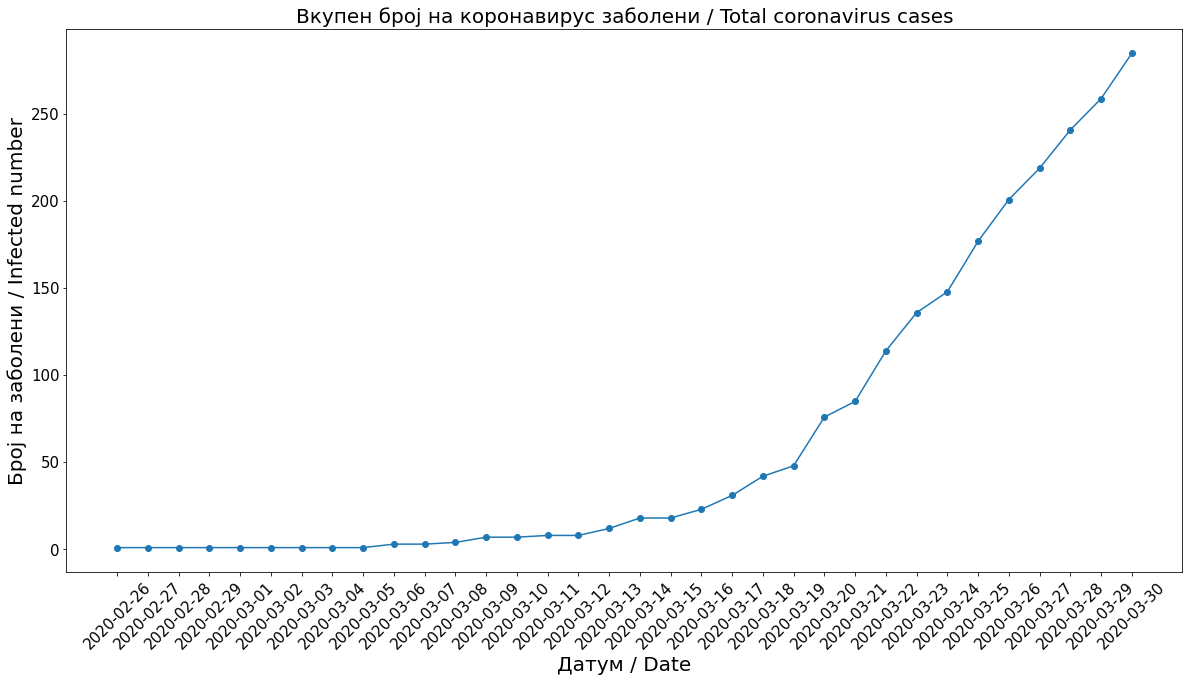

In [18]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['vkupno_novi'], '-o')
plt.title("Вкупен број на коронавирус заболени / Total coronavirus cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Број на заболени / Infected number", fontsize=20)
plt.xticks(rotation = '45', fontsize=15)
plt.yticks(fontsize=15)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text major ticklabel objects>)

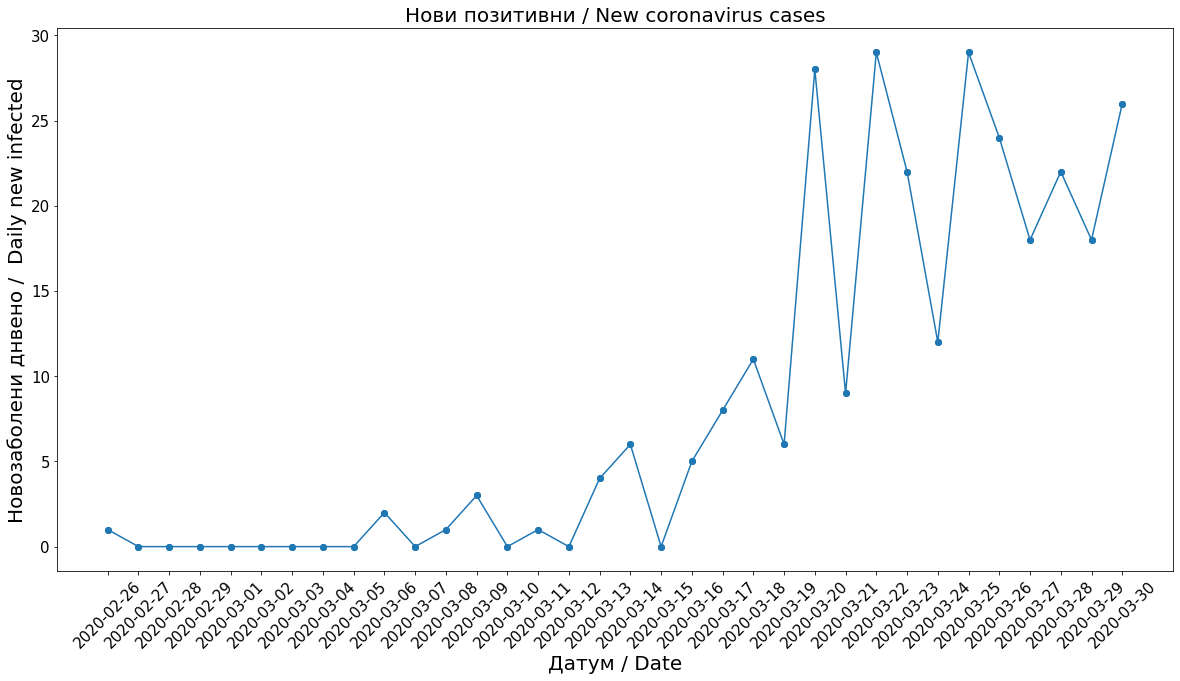

In [19]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['novi_pozitivni'], '-o')
plt.scatter(df['datum'],df['novi_pozitivni'])
plt.title("Нови позитивни / New coronavirus cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Новозаболени днвено /  Daily new infected", fontsize=20)
plt.xticks(fontsize=15, rotation = '45')
plt.yticks(fontsize=15)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

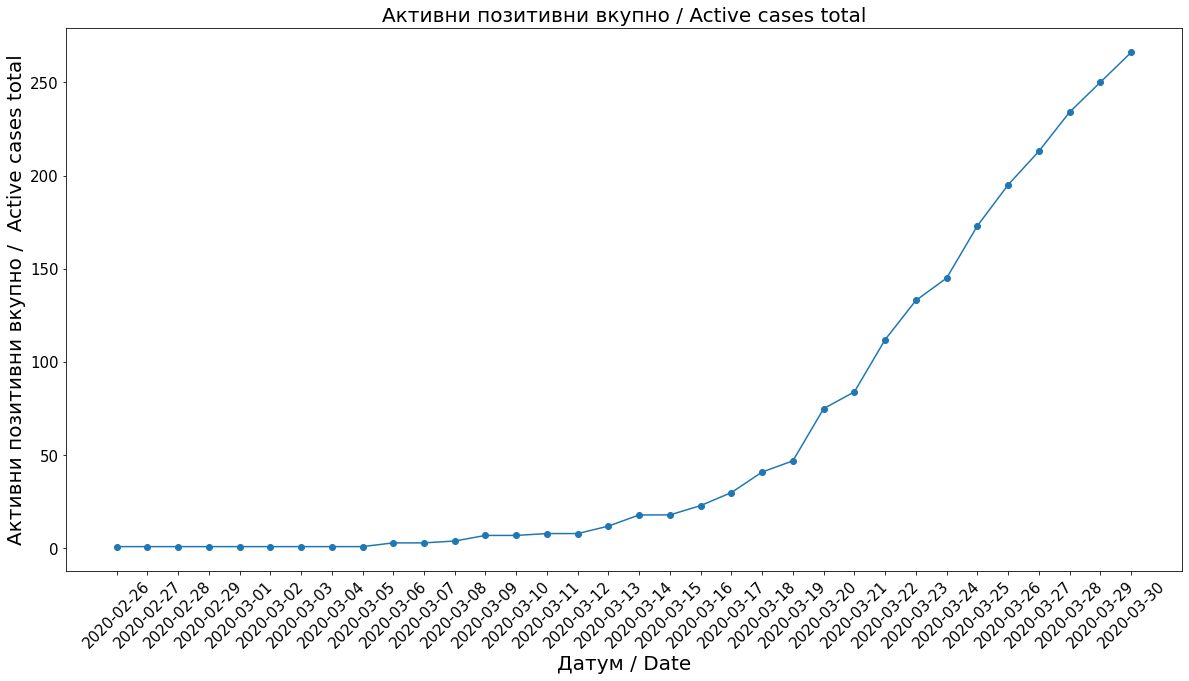

In [20]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['active'], '-o')
plt.title("Активни позитивни вкупно / Active cases total", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Активни позитивни вкупно /  Active cases total", fontsize=20)
plt.xticks(fontsize=15, rotation = '45')
plt.yticks(fontsize=15)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

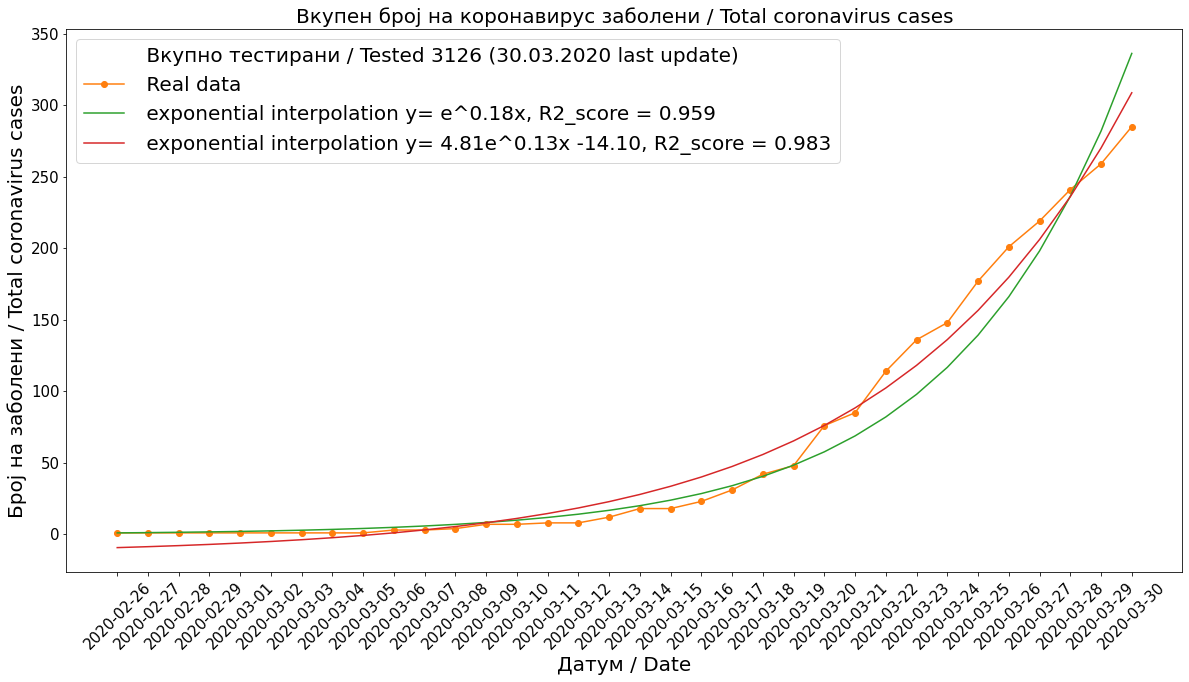

In [21]:
plt.figure(figsize=(20,10))
plt.plot([], [], ' ', label=" Вкупно тестирани / Tested %d (30.03.2020 last update)" %testirani)
plt.plot(df['datum'],df['vkupno_novi'],'-o', label = ' Real data')
#plt.plot(df['datum'],y, label = ' polinomial interpolation y= %2.2fx^2 %2.2fx %+2.2f' % tuple(kvadratni))
plt.plot(df['datum'], y_exp_1, label = ' exponential interpolation y= e^%2.2fx, R2_score = %2.3f ' % tuple(parametri1))
plt.plot(df['datum'], y_exp, label = ' exponential interpolation y= %2.2fe^%2.2fx %+2.2f, R2_score = %2.3f' % tuple(parametri))
plt.legend(fontsize=20)
plt.title("Вкупен број на коронавирус заболени / Total coronavirus cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Број на заболени / Total coronavirus cases", fontsize=20)
plt.xticks(fontsize=15, rotation = '45')
plt.yticks(fontsize=15)


In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


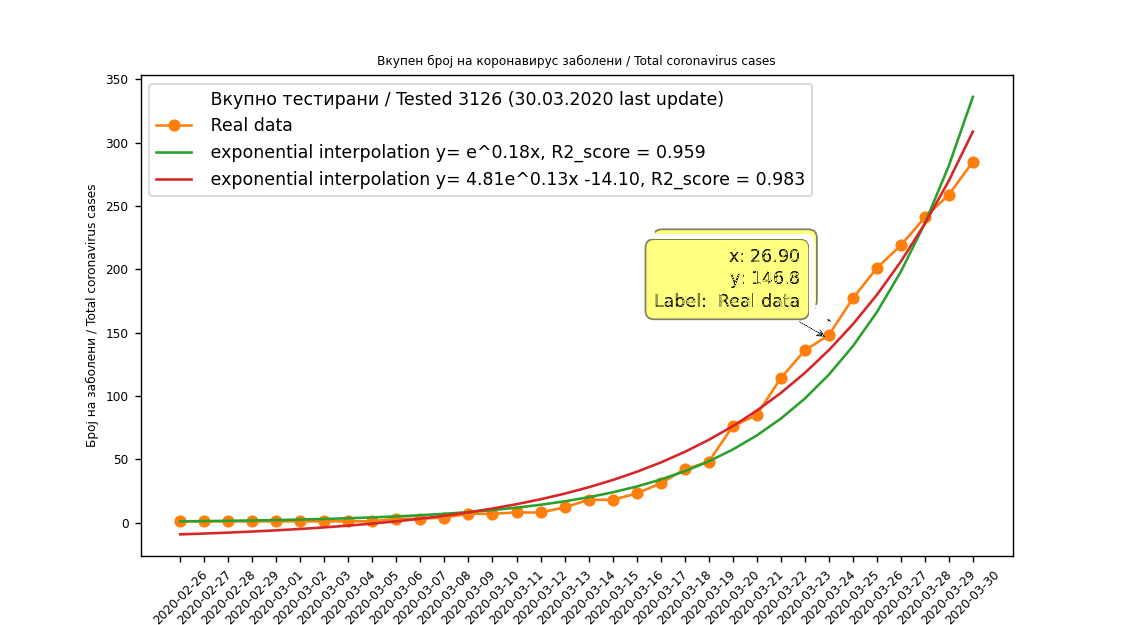

In [23]:
### INTERACTIVE
plt.figure(figsize=(9,5))
plt.plot([], [], ' ', label=" Вкупно тестирани / Tested %d (30.03.2020 last update)" %testirani)
plt.plot(df['datum'],df['vkupno_novi'],'-o', label = ' Real data')
#plt.plot(df['datum'],y, label = ' polinomial interpolation y= %2.2fx^2 %2.2fx %+2.2f' % tuple(kvadratni))
plt.plot(df['datum'], y_exp_1, label = ' exponential interpolation y= e^%2.2fx, R2_score = %2.3f ' % tuple(parametri1))
plt.plot(df['datum'], y_exp, label = ' exponential interpolation y= %2.2fe^%2.2fx %+2.2f, R2_score = %2.3f' % tuple(parametri))
plt.legend(fontsize=10)
plt.title("Вкупен број на коронавирус заболени / Total coronavirus cases", fontsize=7)
plt.xlabel("Датум / Date", fontsize=7)
plt.ylabel("Број на заболени / Total coronavirus cases", fontsize=7)
plt.xticks(fontsize=7, rotation = '45')
plt.yticks(fontsize=7)
datacursor(hover=True)
